# IMPORT THE LIBRARIES


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# LOAD THE DATASET

In [104]:
df=pd.read_csv("/content/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# PERFORMING EDA

###CHECKING FOR NULL VALUES

In [83]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [106]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [107]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [108]:
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

### DROPING UNNECESSARY COLUMNS

In [109]:
df=df.drop(["Cabin","Name","Ticket"],axis=1)

In [110]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())

In [111]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [112]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [113]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

###DATA VISUALIZATION

<ipython-input-114-6f9a5341f84a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='red')


<Axes: xlabel='Age', ylabel='Density'>

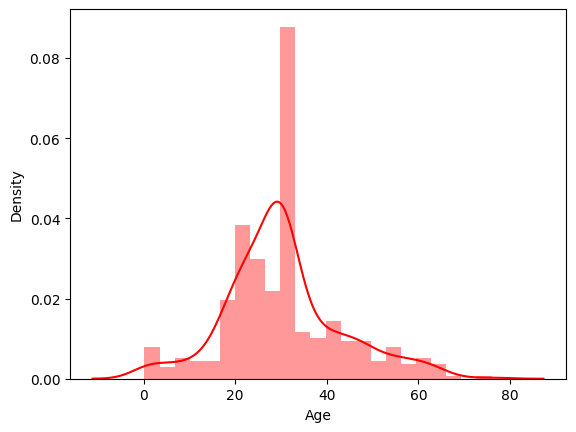

In [114]:
sns.distplot(df['Age'],color='red')

<ipython-input-115-d6fa4c42148b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Sex")["Age","Pclass"].mean().plot(kind='bar')


<Axes: xlabel='Sex'>

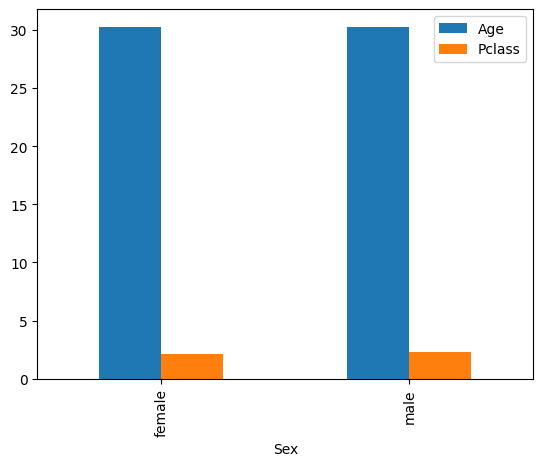

In [115]:
df.groupby("Sex")["Age","Pclass"].mean().plot(kind='bar')

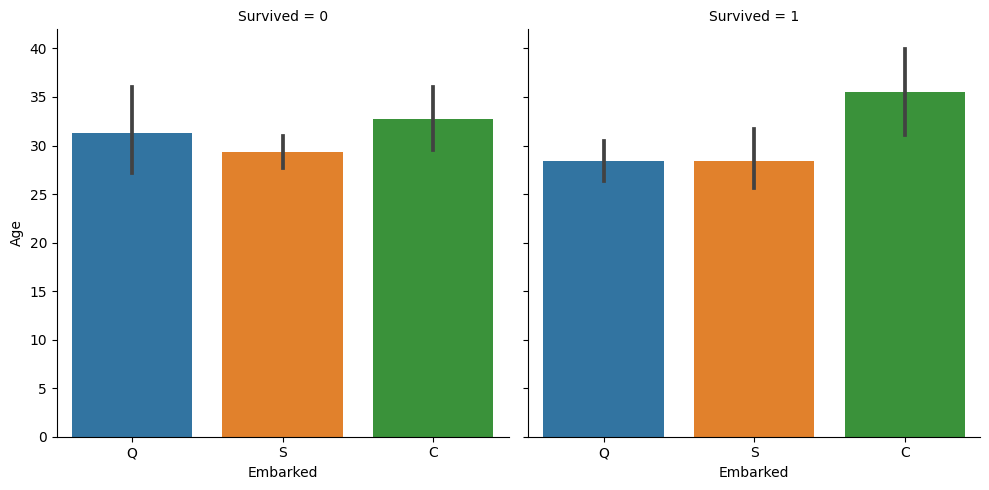

In [116]:
sns.catplot(data=df,x="Embarked",y="Age",col="Survived",kind="bar")

<ipython-input-117-5eb648105375>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

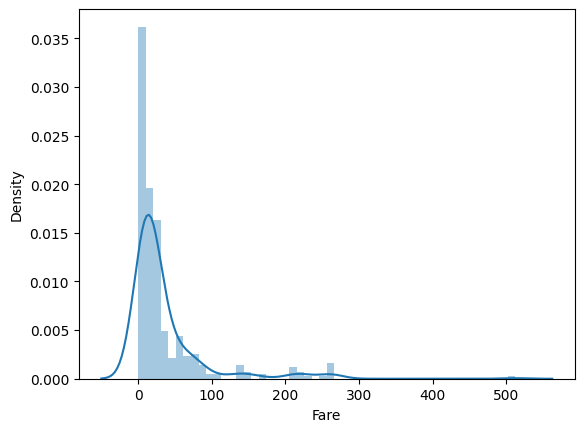

In [117]:
sns.distplot(df["Fare"])

<Axes: ylabel='Embarked'>

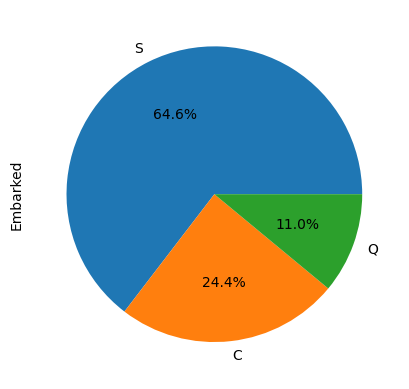

In [118]:
df["Embarked"].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: >

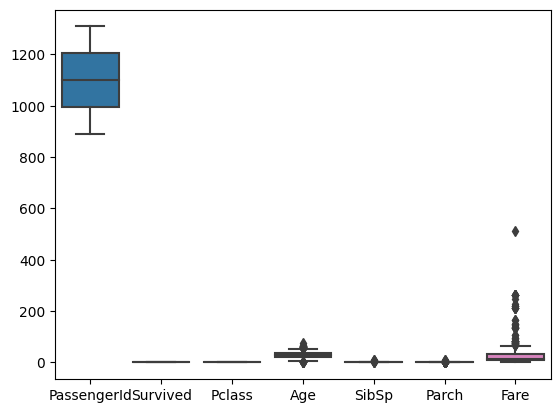

In [119]:
sns.boxplot(df)

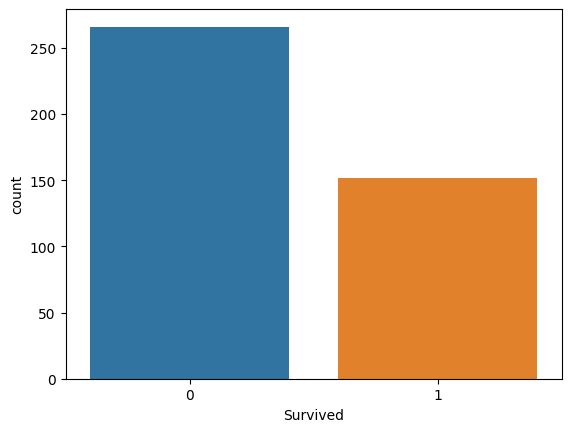

In [120]:
sns.countplot(data=df,x='Survived');

<ipython-input-121-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

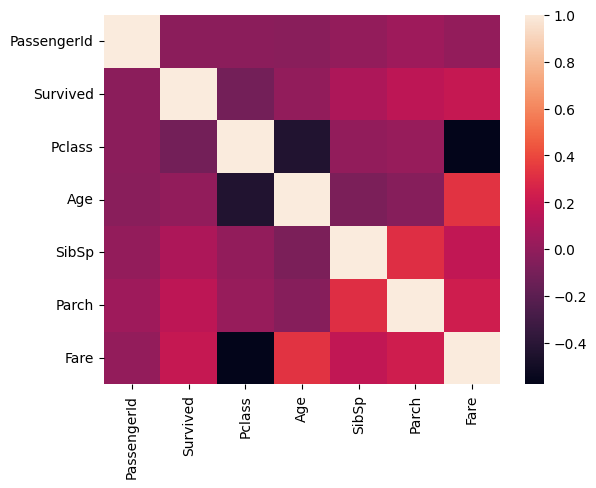

In [121]:
sns.heatmap(df.corr())

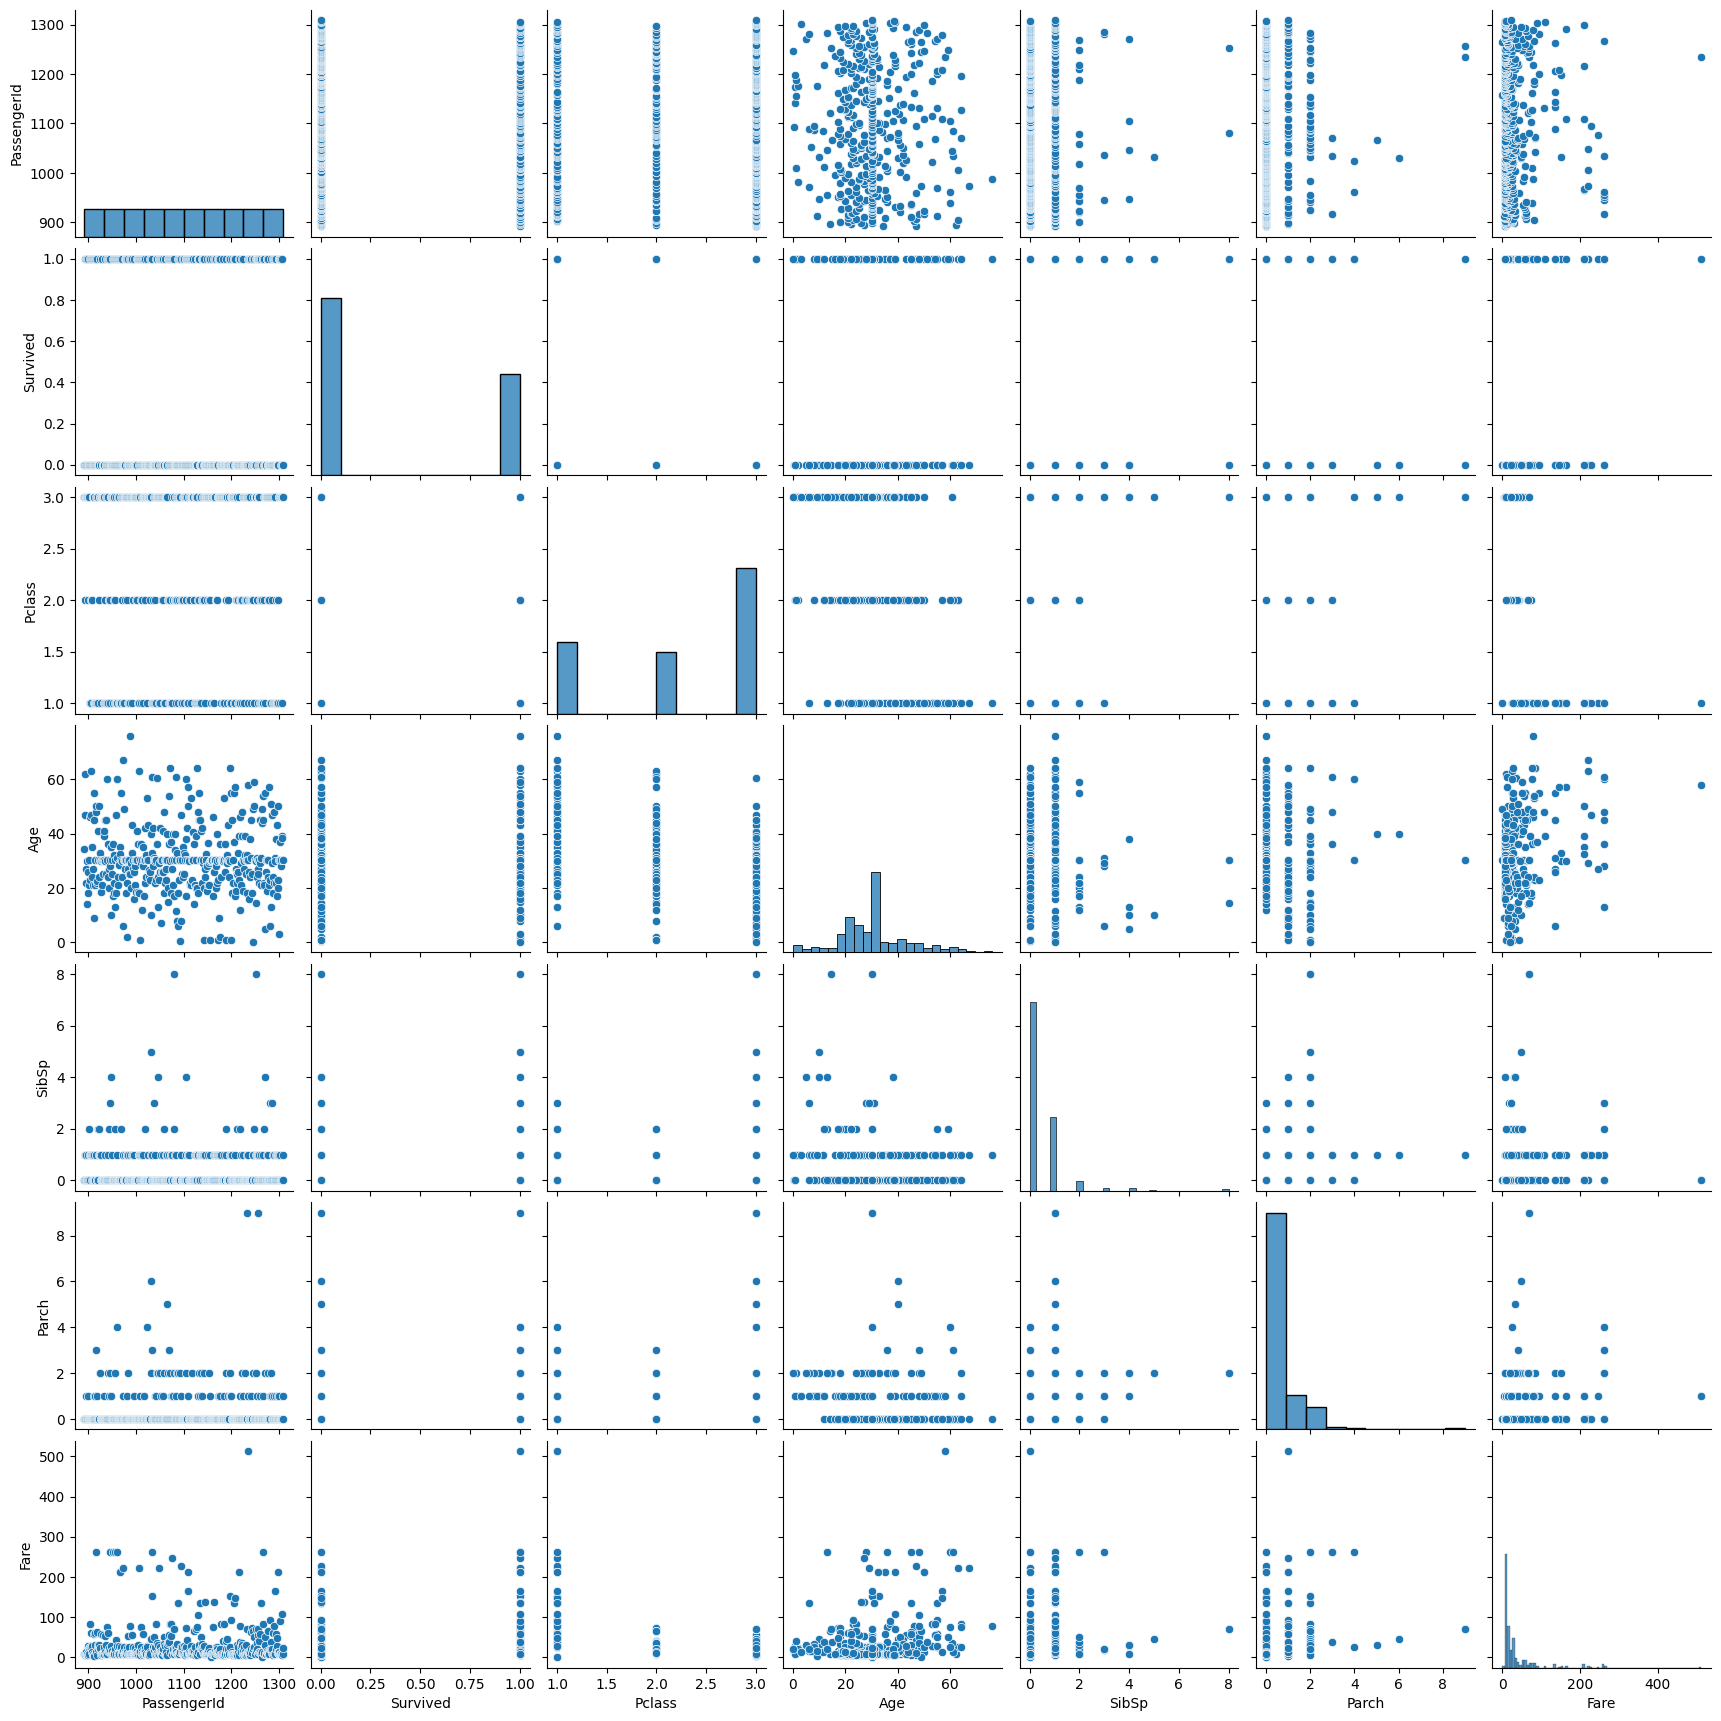

In [100]:
sns.pairplot(df)

In [122]:
#ENCODING
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])

#SPLITTING THE DATASET

In [123]:
y=df.loc[:,"Survived"]
x=df.drop("Survived",axis=1)

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=37)

In [125]:
def report(x,y):
  print("Accuracy score : ",accuracy_score(x,y))
  print(confusion_matrix(x,y))
  print(classification_report(x,y))

# LOGISTIC REGRESSION

In [126]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
ypred_train_lr=lr.predict(x_train)

In [127]:
ypred_test_lr=lr.predict(x_test)

In [130]:
report(y_train,ypred_train_lr)
report(y_test,ypred_test_lr)

Accuracy score :  1.0
[[212   0]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       122

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Accuracy score :  1.0
[[54  0]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# DECISION TREE

In [132]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=5)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [133]:
ypred_train_dtc=dtc.predict(x_train)
ypred_test_dtc=dtc.predict(x_test)

In [134]:
report(y_train,ypred_train_dtc)
report(y_test,ypred_test_dtc)

Accuracy score :  1.0
[[212   0]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       122

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Accuracy score :  1.0
[[54  0]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# RANDOM FOREST

In [135]:
rfc=RandomForestClassifier(n_estimators=100,min_samples_split=5)
rfc.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=5)

In [136]:
ypred_train_rfc=rfc.predict(x_train)
ypred_test_rfc=rfc.predict(x_test)

In [137]:
report(y_train,ypred_train_rfc)
report(y_test,ypred_test_rfc)

Accuracy score :  1.0
[[212   0]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       122

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Accuracy score :  1.0
[[54  0]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# K NEAREST NEIGHBOURS

In [138]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=35)

In [139]:
ypred_train_knn=knn.predict(x_train)
ypred_test_knn=knn.predict(x_test)

In [140]:
report(y_train,ypred_train_knn)
report(y_test,ypred_test_knn)

Accuracy score :  0.655688622754491
[[207   5]
 [110  12]]
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       212
           1       0.71      0.10      0.17       122

    accuracy                           0.66       334
   macro avg       0.68      0.54      0.48       334
weighted avg       0.67      0.66      0.56       334

Accuracy score :  0.6547619047619048
[[54  0]
 [29  1]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        54
           1       1.00      0.03      0.06        30

    accuracy                           0.65        84
   macro avg       0.83      0.52      0.43        84
weighted avg       0.78      0.65      0.53        84



# SUPPORT VECTOR MACHINE

In [141]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=1)
svc.fit(x_train,y_train)

SVC(C=1)

In [142]:
ypred_train_svc=svc.predict(x_train)
ypred_test_svc=svc.predict(x_test)

In [143]:
report(y_train,ypred_train_svc)
report(y_test,ypred_test_svc)

Accuracy score :  0.6347305389221557
[[212   0]
 [122   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       212
           1       0.00      0.00      0.00       122

    accuracy                           0.63       334
   macro avg       0.32      0.50      0.39       334
weighted avg       0.40      0.63      0.49       334

Accuracy score :  0.6428571428571429
[[54  0]
 [30  0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        54
           1       0.00      0.00      0.00        30

    accuracy                           0.64        84
   macro avg       0.32      0.50      0.39        84
weighted avg       0.41      0.64      0.50        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# NAIEVE BAYES

In [144]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [145]:
ypred_train_gnb=gnb.predict(x_train)
ypred_test_gnb=gnb.predict(x_test)

In [146]:
report(y_train,ypred_train_gnb)
report(y_test,ypred_test_gnb)

Accuracy score :  1.0
[[212   0]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       122

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Accuracy score :  1.0
[[54  0]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# XGBOOST

In [147]:
import xgboost as xgb

In [148]:
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [149]:
ypred_train_xgb=xgb.predict(x_train)
ypred_test_xgb=xgb.predict(x_test)

In [150]:
report(y_train,ypred_train_xgb)
report(y_test,ypred_test_xgb)

Accuracy score :  1.0
[[212   0]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       122

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Accuracy score :  1.0
[[54  0]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#VERDICT

**LOW BIAS CAN BE ACHIEVED USING LOGISTIC REGRESSION, DECISION TREE,RANDOM FOREST, NAIVE BAYES AND BOOSTING TECHNIQUES.**

**KNN AND SVC SHOW HIGH BIAS.**